# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

# Reading dataset

In [3]:
data = load_breast_cancer(as_frame=True)

In [5]:
df = data.frame

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploring Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.shape

(569, 31)

# Extracting target and feature variables

In [9]:
X = df.drop('target',axis=1)
y = df['target']

# Splitting data for training and testing

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.15)

# Base model

In [11]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

# Evaluating Base model

In [12]:
y_pred = model.predict(x_test)

In [13]:
accuracy_score(y_test,y_pred)

0.9767441860465116

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.98      0.98      0.98        53

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



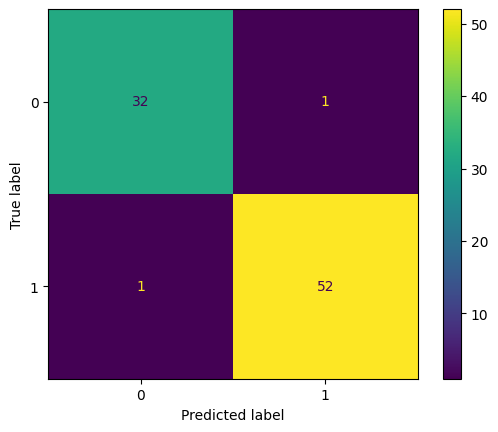

In [16]:
conf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(conf).plot()

# Finding best parameters using Grid Search

In [18]:
model = GradientBoostingClassifier()

In [23]:
param = {
    'n_estimators':[60,70,80,90,100,110,120,180],
    'learning_rate':[0.001,0.01,0.1,1],
    'max_depth':[1,2,3,4,5]

}

In [24]:
grid = GridSearchCV(estimator=model,param_grid=param,cv = 5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [60, 70, 80, 90, 100, 110, 120, 180]},
             scoring='accuracy')

In [25]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=180)

In [26]:
grid.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 180}

In [27]:
scoring = pd.DataFrame(data = grid.cv_results_)

In [28]:
scoring

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157344,0.002962,0.003500,0.000190,0.001,1,60,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.628866,0.628866,0.628866,0.625000,0.635417,0.629403,0.003359,121
1,0.176130,0.011209,0.003034,0.000497,0.001,1,70,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.628866,0.628866,0.628866,0.625000,0.635417,0.629403,0.003359,121
2,0.142072,0.003402,0.002023,0.000074,0.001,1,80,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.628866,0.628866,0.628866,0.625000,0.635417,0.629403,0.003359,121
3,0.160077,0.003642,0.002169,0.000227,0.001,1,90,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.628866,0.628866,0.628866,0.625000,0.635417,0.629403,0.003359,121
4,0.178416,0.002818,0.002066,0.000095,0.001,1,100,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.628866,0.628866,0.628866,0.625000,0.635417,0.629403,0.003359,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.205845,0.031025,0.002371,0.000414,1.000,5,90,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.938144,0.938144,0.958763,0.968750,0.937500,0.948260,0.013043,65
156,0.215068,0.033693,0.002104,0.000083,1.000,5,100,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.938144,0.938144,0.958763,0.968750,0.937500,0.948260,0.013043,65
157,0.226777,0.038833,0.002450,0.000077,1.000,5,110,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.938144,0.938144,0.958763,0.979167,0.947917,0.952427,0.015385,52
158,0.215677,0.044140,0.002378,0.000444,1.000,5,120,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.886598,0.958763,0.958763,0.968750,0.937500,0.942075,0.029554,71


In [29]:
scoring[['params','mean_test_score']].sort_values(by='mean_test_score',ascending = False)

,params,mean_test_score
127,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",0.975215
87,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.973153
126,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",0.973131
121,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",0.973110
123,"{'learning_rate': 1, 'max_depth': 1, 'n_estima...",0.973110
...,...,...
35,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.629403
36,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.629403
37,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.629403
38,"{'learning_rate': 0.001, 'max_depth': 5, 'n_es...",0.629403


In [37]:
scoring.iloc[127]

,127
mean_fit_time,0.327334
std_fit_time,0.00599
mean_score_time,0.002555
std_score_time,0.00006
param_learning_rate,1.0
param_max_depth,1
param_n_estimators,180
params,"{'learning_rate': 1, 'max_depth': 1, 'n_estima..."
split0_test_score,0.948454
split1_test_score,0.989691


In [38]:
best_model = GradientBoostingClassifier(learning_rate=1,max_depth=1,n_estimators=180)
best_model.fit(x_train,y_train)


GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=180)

In [39]:
y_pred = best_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9883720930232558

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.98      1.00      0.99        53

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



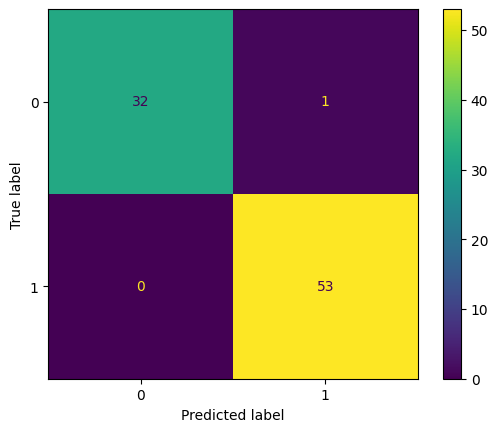

In [41]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()